In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv(r"C:\Users\PRATHEEK POOJARY\OneDrive\Desktop\Machine Learning\Datasets\sonar_dataset.csv", header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
df.shape

(208, 61)

In [5]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [7]:
df.columns

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53,
       54, 55, 56, 57, 58, 59, 60],
      dtype='int64')

In [8]:
df[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [9]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [10]:
df= df.replace({'R':0, 'M':1})

In [11]:
x= df.drop(60, axis=1)
y=df[60]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: 60, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train,y_test= train_test_split(x, y, test_size=0.20, random_state=1)

In [13]:
x_train.shape

(166, 60)

In [14]:
model= keras.Sequential([
    keras.layers.Dense(60, input_shape=(60,), activation='relu'),
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=100, batch_size=8)



Epoch 1/100


21/21 [==============================] - 1s 1ms/step - loss: 0.6963 - accuracy: 0.5482
Epoch 2/100
21/21 [==============================] - 0s 996us/step - loss: 0.6588 - accuracy: 0.5542
Epoch 3/100
21/21 [==============================] - 0s 914us/step - loss: 0.6353 - accuracy: 0.6084
Epoch 4/100
21/21 [==============================] - 0s 960us/step - loss: 0.6126 - accuracy: 0.6627
Epoch 5/100
21/21 [==============================] - 0s 913us/step - loss: 0.5870 - accuracy: 0.7169
Epoch 6/100
21/21 [==============================] - 0s 898us/step - loss: 0.5581 - accuracy: 0.7711
Epoch 7/100
21/21 [==============================] - 0s 909us/step - loss: 0.5390 - accuracy: 0.7410
Epoch 8/100
21/21 [==============================] - 0s 907us/step - loss: 0.5008 - accuracy: 0.7952
Epoch 9/100
21/21 [==============================] - 0s 925us/step - loss: 0.4879 - accuracy: 0.7711
Epoch 10/100
21/21 [==============================] - 0s 910us/step - loss: 0.4651 - accu

In [15]:
model.evaluate(x_train, y_train)

6/6 [==============================] - 0s 1ms/step - loss: 0.0036 - accuracy: 1.0000


[0.003557568648830056, 1.0]

In [16]:
model.evaluate(x_test,y_test)   # now the model is over fitted

2/2 [==============================] - 0s 5ms/step - loss: 1.0100 - accuracy: 0.7619


[1.009979009628296, 0.761904776096344]

In [17]:
y_pred= model.predict(x_test)
print(y_pred[0:5])

y_pred= np.round(y_pred)
print(y_pred[0:5])

2/2 [==============================] - 0s 2ms/step
[[1.0000000e+00]
 [8.0984477e-03]
 [3.9939608e-02]
 [9.9999970e-01]
 [1.8660062e-04]]
[[1.]
 [0.]
 [0.]
 [1.]
 [0.]]


In [18]:
y_test[0:5]

186    1
155    1
165    1
200    1
58     0
Name: 60, dtype: int64

In [19]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.73      0.76        22
           1       0.73      0.80      0.76        20

    accuracy                           0.76        42
   macro avg       0.76      0.76      0.76        42
weighted avg       0.77      0.76      0.76        42



<Axes: >

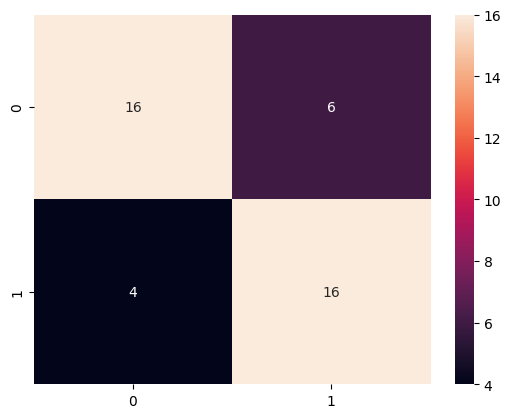

In [20]:
cm= confusion_matrix(y_test,y_pred)
sns.heatmap(data=cm, annot=True)

In [21]:
accuracy_score(y_test, y_pred)

0.7619047619047619

Implementing dropout regularization

In [22]:
model2= keras.Sequential([
    keras.layers.Dense(60, input_shape=(60,), activation='relu'),
    keras.layers.Dropout(0.5),          #drop the 50% of nueorons
    keras.layers.Dense(30, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='sigmoid')
])

model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model2.fit(x_train, y_train, epochs=100, batch_size=8)

Epoch 1/100
21/21 [==============================] - 1s 1ms/step - loss: 0.7208 - accuracy: 0.5723
Epoch 2/100
21/21 [==============================] - 0s 1ms/step - loss: 0.7233 - accuracy: 0.4940
Epoch 3/100
21/21 [==============================] - 0s 1ms/step - loss: 0.7167 - accuracy: 0.4940
Epoch 4/100
21/21 [==============================] - 0s 1ms/step - loss: 0.7068 - accuracy: 0.5060
Epoch 5/100
21/21 [==============================] - 0s 993us/step - loss: 0.6867 - accuracy: 0.5482
Epoch 6/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6883 - accuracy: 0.5542
Epoch 7/100
21/21 [==============================] - 0s 1ms/step - loss: 0.7072 - accuracy: 0.4880
Epoch 8/100
21/21 [==============================] - 0s 989us/step - loss: 0.6565 - accuracy: 0.5723
Epoch 9/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6638 - accuracy: 0.6325
Epoch 10/100
21/21 [==============================] - 0s 1ms/step - loss: 0.6799 - accuracy: 0.5663
Epoch

In [23]:
model2.evaluate(x_test,y_test)

2/2 [==============================] - 0s 5ms/step - loss: 0.5219 - accuracy: 0.7857


[0.5218827128410339, 0.7857142686843872]

In [24]:
accuracy_score(y_test, y_pred)

0.7619047619047619